In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
#load dataset

athletes = pd.read_csv ('athlete_events.csv')
regions = pd.read_csv ('noc_regions.csv')

In [8]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [10]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [13]:
# joining dataframes

athletes_df = athletes.merge(regions, how = 'left', on = 'NOC')
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [14]:
athletes_df.shape # We can see how many rows and columns are in the dataframe

(271116, 17)

In [15]:
athletes_df.info() # datatypes of variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [18]:
athletes_df.describe().T # Statistical informations

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.0,102097.25,135571.0
Age,261642.0,25.556898,6.393561,10.0,21.0,24.0,28.00,97.0
Height,210945.0,175.338970,10.518462,127.0,168.0,175.0,183.00,226.0
Weight,208241.0,70.702393,14.348020,25.0,60.0,70.0,79.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.0,2002.00,2016.0


In [26]:
athletes_df.isna().values.any() # Checking NA


True

In [27]:
athletes_df.isnull().sum() # Checking how many NA in each variables

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [38]:
athletes_df.query('Team == "Turkey"').head() #Turkey's details in Olympic Games


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
180,78,Salim Abanoz,M,26.0,NaN,NaN,Turkey,TUR,1996 Summer,1996,Summer,Atlanta,Judo,Judo Men's Lightweight,NaN,Turkey,NaN
745,428,Elvan Abeylegesse,F,21.0,159.0,40.0,Turkey,TUR,2004 Summer,2004,Summer,Athina,Athletics,"Athletics Women's 1,500 metres",NaN,Turkey,NaN
746,428,Elvan Abeylegesse,F,21.0,159.0,40.0,Turkey,TUR,2004 Summer,2004,Summer,Athina,Athletics,"Athletics Women's 5,000 metres",NaN,Turkey,NaN
747,428,Elvan Abeylegesse,F,25.0,159.0,40.0,Turkey,TUR,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Women's 5,000 metres",Silver,Turkey,NaN
748,428,Elvan Abeylegesse,F,25.0,159.0,40.0,Turkey,TUR,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Women's 10,000 metres",NaN,Turkey,NaN


In [44]:
top10_countries = athletes_df.Team.value_counts().sort_values(ascending=False).head(10) # Top countries participating
top10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

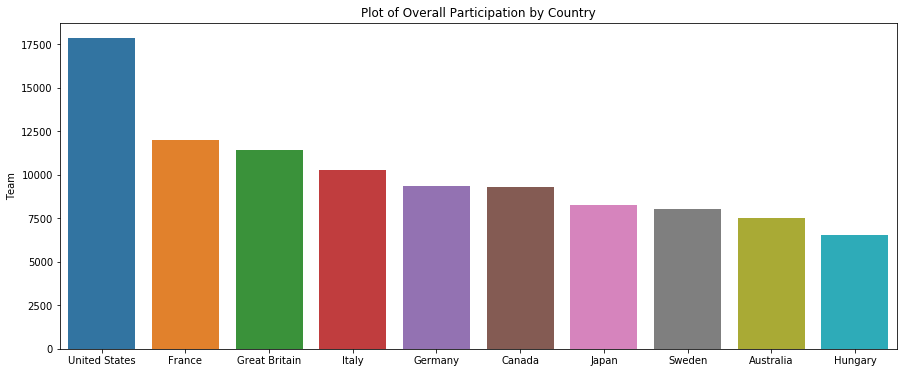

In [56]:
plt.figure(figsize=(15,6))
plt.title('Plot of Overall Participation by Country')
sns.barplot(x=top10_countries.index, y=top10_countries) # plot of overall participation of top 10 country

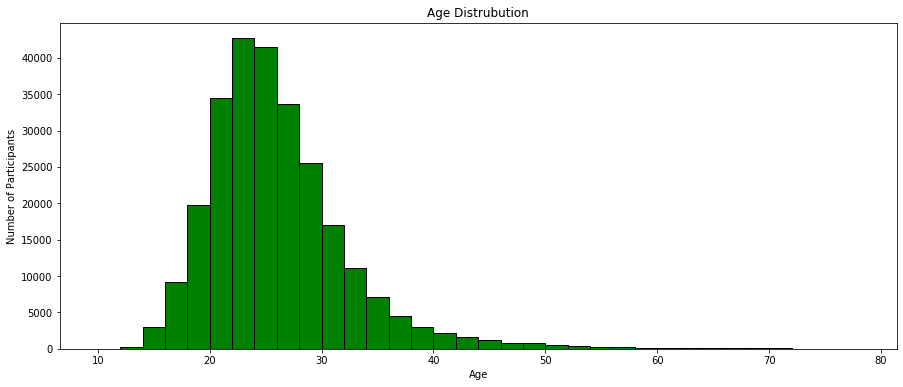

In [60]:
# Plot of age distrubition of athletes(taken between ages of 10 and 80)
plt.figure(figsize=(15,6))
plt.title('Age Distrubution of Athletes')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.hist(athletes_df.Age, bins=np.arange(10,80,2), color = 'green', edgecolor = 'black');

In [64]:
summerseason = athletes_df[athletes_df.Season == 'Summer'].Sport.unique() # Olympic sports that was on summer season
summerseason

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [65]:
gendercount = athletes_df.Sex.value_counts() # M and F participants
gendercount

M    196594
F     74522
Name: Sex, dtype: int64

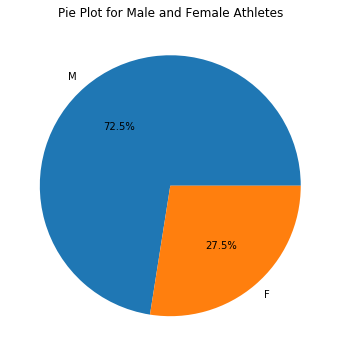

In [77]:
# pie plot for F, M athletes

plt.figure(figsize=(15,6))
plt.title('Pie Plot for Male and Female Athletes')
plt.pie(gendercount, labels=gendercount.index, autopct ='%1.1f%%');


In [78]:
athletes_df.Medal.value_counts() # Medal counts

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [84]:
athletes_df[athletes_df.Team == 'Turkey'].Medal.value_counts() # Turkey's olympic medal counts

Gold      40
Bronze    28
Silver    27
Name: Medal, dtype: int64

In [127]:
athletes_df[athletes_df.Medal == 'Gold'].region.value_counts().reset_index(name='Medal') # Total Gold metal for each country


,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575
...,...,...
94,Panama,1
95,Tajikistan,1
96,Jordan,1
97,Vietnam,1


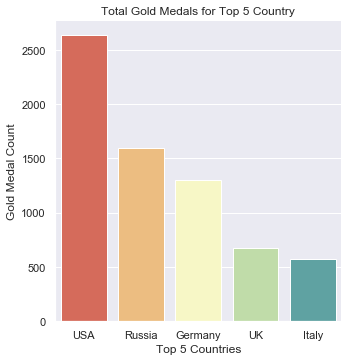

In [139]:
#visualizaton for total gold medal for each country

totalgolds = athletes_df[athletes_df.Medal == 'Gold'].region.value_counts().reset_index(name='Medal').head(5)
goldplot = sns.catplot(data= totalgolds, x="index", y="Medal", kind = "bar", palette = "Spectral")
plt.title("Total Gold Medals for Top 5 Country")
goldplot.set_xlabels("Top 5 Countries")
goldplot.set_ylabels("Gold Medal Count");


In [101]:
# women athletes participants in each olympics
female_parts = athletes_df[(athletes_df.Sex == 'F') & (athletes_df.Season == 'Summer')][['Sex','Year']]
female_parts = female_parts.groupby('Year').count().reset_index()
female_parts.columns=['Year','Women Athletes in Each Olympics']
female_parts

,Year,Women Athletes in Each Olympics
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87
5,1920,134
6,1924,244
7,1928,404
8,1932,347
9,1936,468


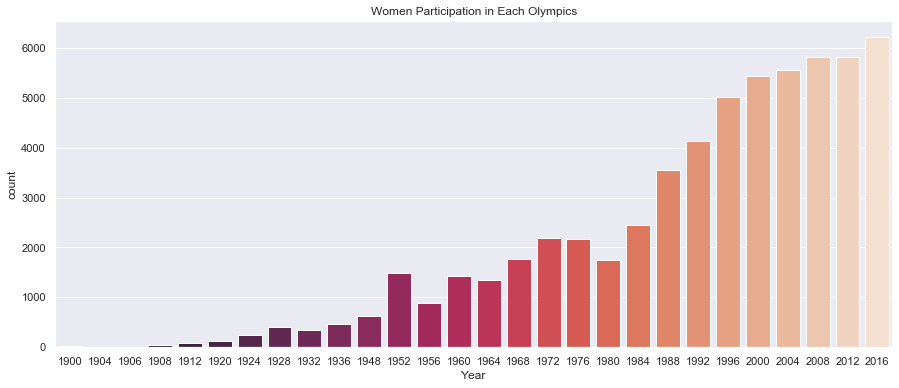

In [135]:
# women athletes participants in each olympics(summer season) with graphs
womenoly=athletes_df[(athletes_df.Sex == 'F') & (athletes_df.Season == 'Summer')]
sns.set(style="darkgrid")
plt.figure(figsize=(15,6))
plt.title('Women Participation in Each Olympics')
sns.countplot(x='Year',data=womenoly, palette = "rocket");

In [150]:
# the last olympics games on this dataset

lastolympic = athletes_df.Year.max()
lastolympic

2016

In [157]:
# Female athletes count that won Gold medal on the last olympic games for each country
teams = athletes_df[(athletes_df.Year == lastolympic) & (athletes_df.Medal=='Gold') & (athletes_df.Sex=='F')].Team
teams.value_counts()


United States      84
Russia             39
China              30
Great Britain      28
Germany            27
Australia          20
Hungary            11
Japan               8
South Korea         7
Netherlands         7
Romania             4
France              4
Spain               4
Brazil              3
Kenya               3
Canada              3
Poland              3
Sweden              2
Thailand            2
Argentina           2
Greece              2
Germany-1           2
Jamaica             2
Colombia            2
Russia-2            2
Croatia             2
South Africa        1
United States-2     1
Slovenia            1
New Zealand         1
Puerto Rico         1
Italy               1
Indonesia-1         1
Denmark             1
Ethiopia            1
Bahrain             1
Chinese Taipei      1
North Korea         1
Kosovo              1
Bahamas             1
Belgium             1
Name: Team, dtype: int64